In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('hotel.csv')
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0.0,Transient,107.0,0.0,0.0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0.0,Transient,103.0,0.0,1.0,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0.0,Transient,82.0,0.0,1.0,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0.0,Transient,105.5,0.0,0.0,Canceled,2015-04-22


## Problem & Goals

Mengurangi atau meminimalisir pelanggan yang melakukan cancel saat reservasi hotel bertujuan agar dapat lebih menaikkan revenue

## Analisa Desktiptif & Handling Missing Value

In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   float64
deposit_type                       object
agent                             

In [5]:
# Pengecekan Kolom Numerikal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,50434.0,0.325673,0.468630,0.00,0.0,0.00,1.00,1.0
lead_time,50434.0,88.487310,92.011958,0.00,12.0,59.00,140.00,737.0
arrival_date_year,50434.0,2015.970337,0.742575,2015.00,2015.0,2016.00,2017.00,2017.0
arrival_date_week_number,50434.0,27.366023,14.035093,1.00,15.0,29.00,39.00,53.0
arrival_date_day_of_month,50434.0,15.895428,8.820124,1.00,8.0,16.00,24.00,31.0
stays_in_weekend_nights,50434.0,1.115359,1.115705,0.00,0.0,1.00,2.00,19.0
stays_in_week_nights,50434.0,2.935559,2.331135,0.00,1.0,2.00,4.00,50.0
adults,50434.0,1.856466,0.655740,0.00,2.0,2.00,2.00,55.0
children,50430.0,0.115645,0.424926,0.00,0.0,0.00,0.00,10.0
babies,50434.0,0.012135,0.118866,0.00,0.0,0.00,0.00,10.0


In [6]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             478
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       1
deposit_type                          1
agent                              8827
company                           47102


In [27]:
## Drop Table
df.drop(['country', 'company', 'agent'], axis = 1, inplace = True)

In [28]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   1
deposit_type                      1
days_in_waiting_list              1
customer_type                     1
adr                               1
required_car_parking_spaces       1
total_of_special_requests         1
reservation_status          

In [66]:
df.dropna(axis=0, subset=['children'], inplace= True)
df.dropna(axis=0, subset=['booking_changes'], inplace= True)
df.dropna(axis=0, subset=['deposit_type'], inplace= True)
df.dropna(axis=0, subset=['days_in_waiting_list'], inplace= True)
df.dropna(axis=0, subset=['adr'], inplace= True)
df.dropna(axis=0, subset=['customer_type'], inplace= True)
df.dropna(axis=0, subset=['required_car_parking_spaces'], inplace= True)
df.dropna(axis=0, subset=['total_of_special_requests'], inplace= True)
df.dropna(axis=0, subset=['reservation_status'], inplace= True)
df.dropna(axis=0, subset=['reservation_status_date'], inplace= True)

In [67]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [68]:
hotelDesc = []

for i in df.columns:
    hotelDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [69]:
pd.DataFrame(hotelDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

# Pengecekan Nama Kolom, Tipe Data dan Missing Value

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,hotel,object,0,0.0,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.0,2,"[1, 0]"
2,lead_time,int64,0,0.0,413,"[278, 23]"
3,arrival_date_year,int64,0,0.0,3,"[2016, 2015]"
4,arrival_date_month,object,0,0.0,12,"[June, March]"
5,arrival_date_week_number,int64,0,0.0,53,"[13, 16]"
6,arrival_date_day_of_month,int64,0,0.0,31,"[8, 15]"
7,stays_in_weekend_nights,int64,0,0.0,16,"[12, 18]"
8,stays_in_week_nights,int64,0,0.0,32,"[3, 2]"
9,adults,int64,0,0.0,14,"[1, 10]"


## Analisis & Visualisasi Data (Univariate dan Multivariate)

In [140]:
pd.crosstab(df['is_canceled'], columns='counts')

col_0,counts
is_canceled,
0,34009
1,16420


- 1 => canceled
- 0 => not

In [72]:
pd.crosstab(index=df['hotel'], columns= df['is_canceled'])

is_canceled,0,1
hotel,,
City Hotel,5071,5298
Resort Hotel,28938,11122


## Insight
Resort Hotel yang terletak di daerah tujuan wisata memiliki jumlah yang paling banyak pelanggan tidak cancel reservasi, sedangkan City Hotel yang berada di tengah ibu kota memiliki jumlah lebih sedikit 

In [92]:
pd.crosstab(index=df['hotel'], columns=[df['distribution_channel'], df['is_canceled']]).sort_values('hotel', ascending=False)

distribution_channel Corporate      Direct       GDS     TA/TO       Undefined
is_canceled                  0    1      0     1   0  1      0     1         0
hotel                                                                         
Resort Hotel              2581  688   6540  1325   0  0  19816  9109         1
City Hotel                 119   88    462   198   1  1   4489  5011         0

## Insight
Travel Agent (TA/TO) merupakan distributor memiliki jumlah pelanggan paling banyak yg melakukan cancel baik di Resort Hotel maupun City Hotel

In [134]:
pd.crosstab(index=df['customer_type'], columns= df['is_canceled'])

is_canceled,0,1
customer_type,,
Contract,2175,326
Group,278,36
Transient,22593,13229
Transient-Party,8963,2829


## Insight
Tipe Customer yang sering melakukan cancel reservasi hotel ialah Customer yang Sementara

In [168]:
cus_hotel=pd.crosstab(index=df['hotel'], columns=df['customer_type'])
cus_hotel.reset_index(inplace=True)
cus_hotel

customer_type,hotel,Contract,Group,Transient,Transient-Party
0,City Hotel,725,30,5613,4001
1,Resort Hotel,1776,284,30209,7791


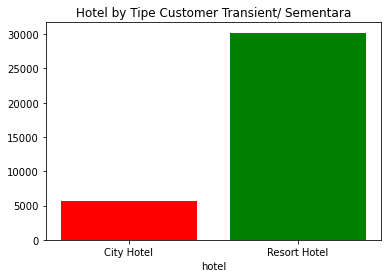

In [169]:
plt.bar(cus_hotel['hotel'],cus_hotel['Transient'], color=['r','g'])
plt.title('Hotel by Tipe Customer Transient/ Sementara')
plt.xlabel('hotel')
plt.show()

## Insight
Melihat Perbandingan antara City-Resort Hotel berdasarkan Tipe Customer yg sering melakukan Cancel reservasi hotel

In [172]:
tipe_Cus=pd.crosstab(index=df['customer_type'], columns='Count')
tipe_Cus.reset_index(inplace=True)
tipe_Cus

col_0,customer_type,Count
0,Contract,2501
1,Group,314
2,Transient,35822
3,Transient-Party,11792


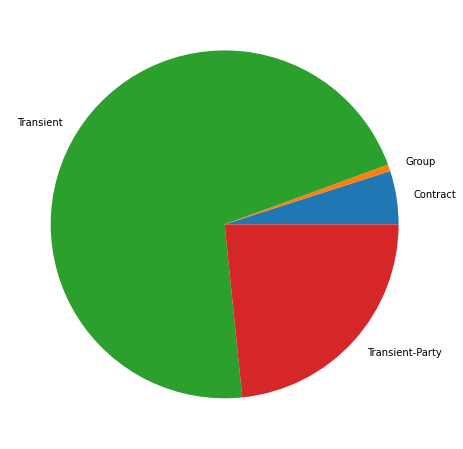

In [176]:
plt.figure(figsize=(10,8))
plt.pie(tipe_Cus['Count'], labels=tipe_Cus['customer_type'])
plt.show()

## Insight
Melihat Komposisi Jumlah Tipe Customer yang paling banyak melakukan cancel reservasi hotel

In [154]:
cancel= pd.crosstab(df['distribution_channel'], columns='counts').sort_values('counts', ascending=False)
cancel.reset_index(inplace=True)
cancel

col_0,distribution_channel,counts
0,TA/TO,38425
1,Direct,8525
2,Corporate,3476
3,GDS,2
4,Undefined,1


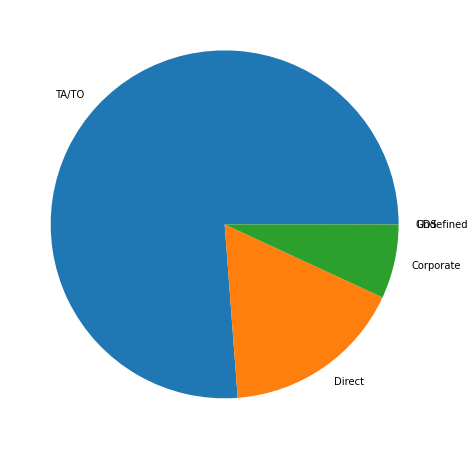

In [156]:
plt.figure(figsize=(10,8))
plt.pie(cancel['counts'], labels=cancel['distribution_channel'])
plt.show()

## Kesimpulan & Saran

- Resort Hotel yang terletak di daerah tujuan wisata memiliki jumlah yang paling banyak pelanggan tidak cancel reservasi, sedangkan City Hotel yang berada di tengah ibu kota memiliki jumlah lebih sedikit 
- Travel Agent (TA/TO) merupakan distributor memiliki jumlah pelanggan paling banyak yg melakukan cancel baik di Resort Hotel maupun City Hotel
- Tipe Customer yang sering melakukan cancel reservasi hotel ialah Customer yang Sementara

## Rekomendasi 

Melakukan Promo tertentu bagi City Hotel agar meminimalisir pelanggan melakukan cancel reservasi
- Contoh : Memberikan Diskon kamar kepada tipe cutomer Sementara/ Transient yang sering melakukan cancel reservasi hotel
- Contoh : Memberikan Promo Booking kamar mendapatkan fasilitas lebih seperti Sarapan pagi, siang, malam, Free Akses ke Gym, Transportasi antar jemput dll 

## Asumsi

- banyak cancel reservasi hotel terjadi krn banyaknya tipe customer sementara yang membooking di City Hotel